# 1. Import and Warehouse Data

In [1]:
# Importing the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connecting to DB

class DBConnect:
    def __init__(self):
        self.connection = None
    
    def connectDatabase(self):
        try:
            self.connection = mysql.connector.connect(
                user = 'root', 
                password = 'mukul@0720', 
                host = '127.0.0.1', 
                database = 'telecomdb'
            )
        except mysql.connector.Error as err:
            print(err)
        else:
            if self.connection.is_connected():
                print("Connected to Database (telecomdb).")
    
    def fetchData(self, table_name):
        query = f"SELECT * FROM {table_name}"
        return pd.read_sql(query, self.connection)

connector = DBConnect()
connection = connector.connectDatabase()

Connected to Database (telecomdb).


In [3]:
# Importing all the datasets and exploring shape and size.

df1 = connector.fetchData('telecomCustomerChurn1')
df2 = connector.fetchData('telecomCustomerChurn2')

print(f"Shape of TelecomCustomerChurn1: {df1.shape}")
print(f"Size of TelecomCustomerChurn1: {df1.size}")
print(f"Shape of TelecomCustomerChurn2: {df2.shape}")
print(f"Size of TelecomCustomerChurn2: {df2.size}")

Shape of TelecomCustomerChurn1: (7043, 10)
Size of TelecomCustomerChurn1: 70430
Shape of TelecomCustomerChurn2: (7032, 12)
Size of TelecomCustomerChurn2: 84384


In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Merging all datasets on customerID and exploring shape and size.

df = pd.merge(df1, df2, on = 'customerID')

print(f"Shape of merged Dataset: {df.shape}")
print(f"Size of the merged Dataset: {df.size}")

Shape of merged Dataset: (7032, 21)
Size of the merged Dataset: 147672


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 2. Data Cleansing and Exploratory Data Analysis

## Data Cleansing

In [11]:
# Checking the percentage of missing values in each colum of the data frame and Dropping missing values if any.

def checkMissingValue(df):
    missingValues = df.isnull().sum() / len(df) * 100
    print(missingValues)
    if missingValues.any():
        print("Missing Values found and has been dropped")
        df.dropna(inplace = True)
    else:
        print("No missing values found.")
    return df

df = checkMissingValue(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64
No missing values found.


In [12]:
# Checking if there are any duplicate records in the dataset.

def checkDuplicate(df):
    duplicate_values = df.duplicated().sum()
    print(f"Number of duplicate value: {duplicate_values}")
    if duplicate_values > 0:
        print("Duplicates values were present and has been removed.")
        df.drop_duplicates(inplace = True)
    return df

df = checkDuplicate(df)

Number of duplicate value: 0


In [13]:
# Dropping the column redundant for the analysis and Pre-Processing the Data.

def preprocess_data(df):
    
    df.drop(columns=['customerID'], axis = 0, inplace = True)

    # Replacing No phone service to No in MultipleLines column.
    df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'NO')

    # Replacing No internet service to No in below columns.
    col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for val in col:
        df[val] = df[val].replace('No internet service', 'No')
    
    return df

df = preprocess_data(df)

In [14]:
# Converting Senior Citizen column from numeric to categorical for encoding

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})

In [15]:
# Encoding Categorical Variables

def objToInt(df_series):
    if df_series.dtype == 'object':
        df_series = LabelEncoder().fit_transform(df_series)
    return df_series

dfCopy = df.copy()
encoded_df = dfCopy.apply(lambda x: objToInt(x))
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
# Statistical Analysis on the data.

def statisticalAnalysis(df):
    return df.describe()

statisticalAnalysis(df)

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

## Univariate Analysis

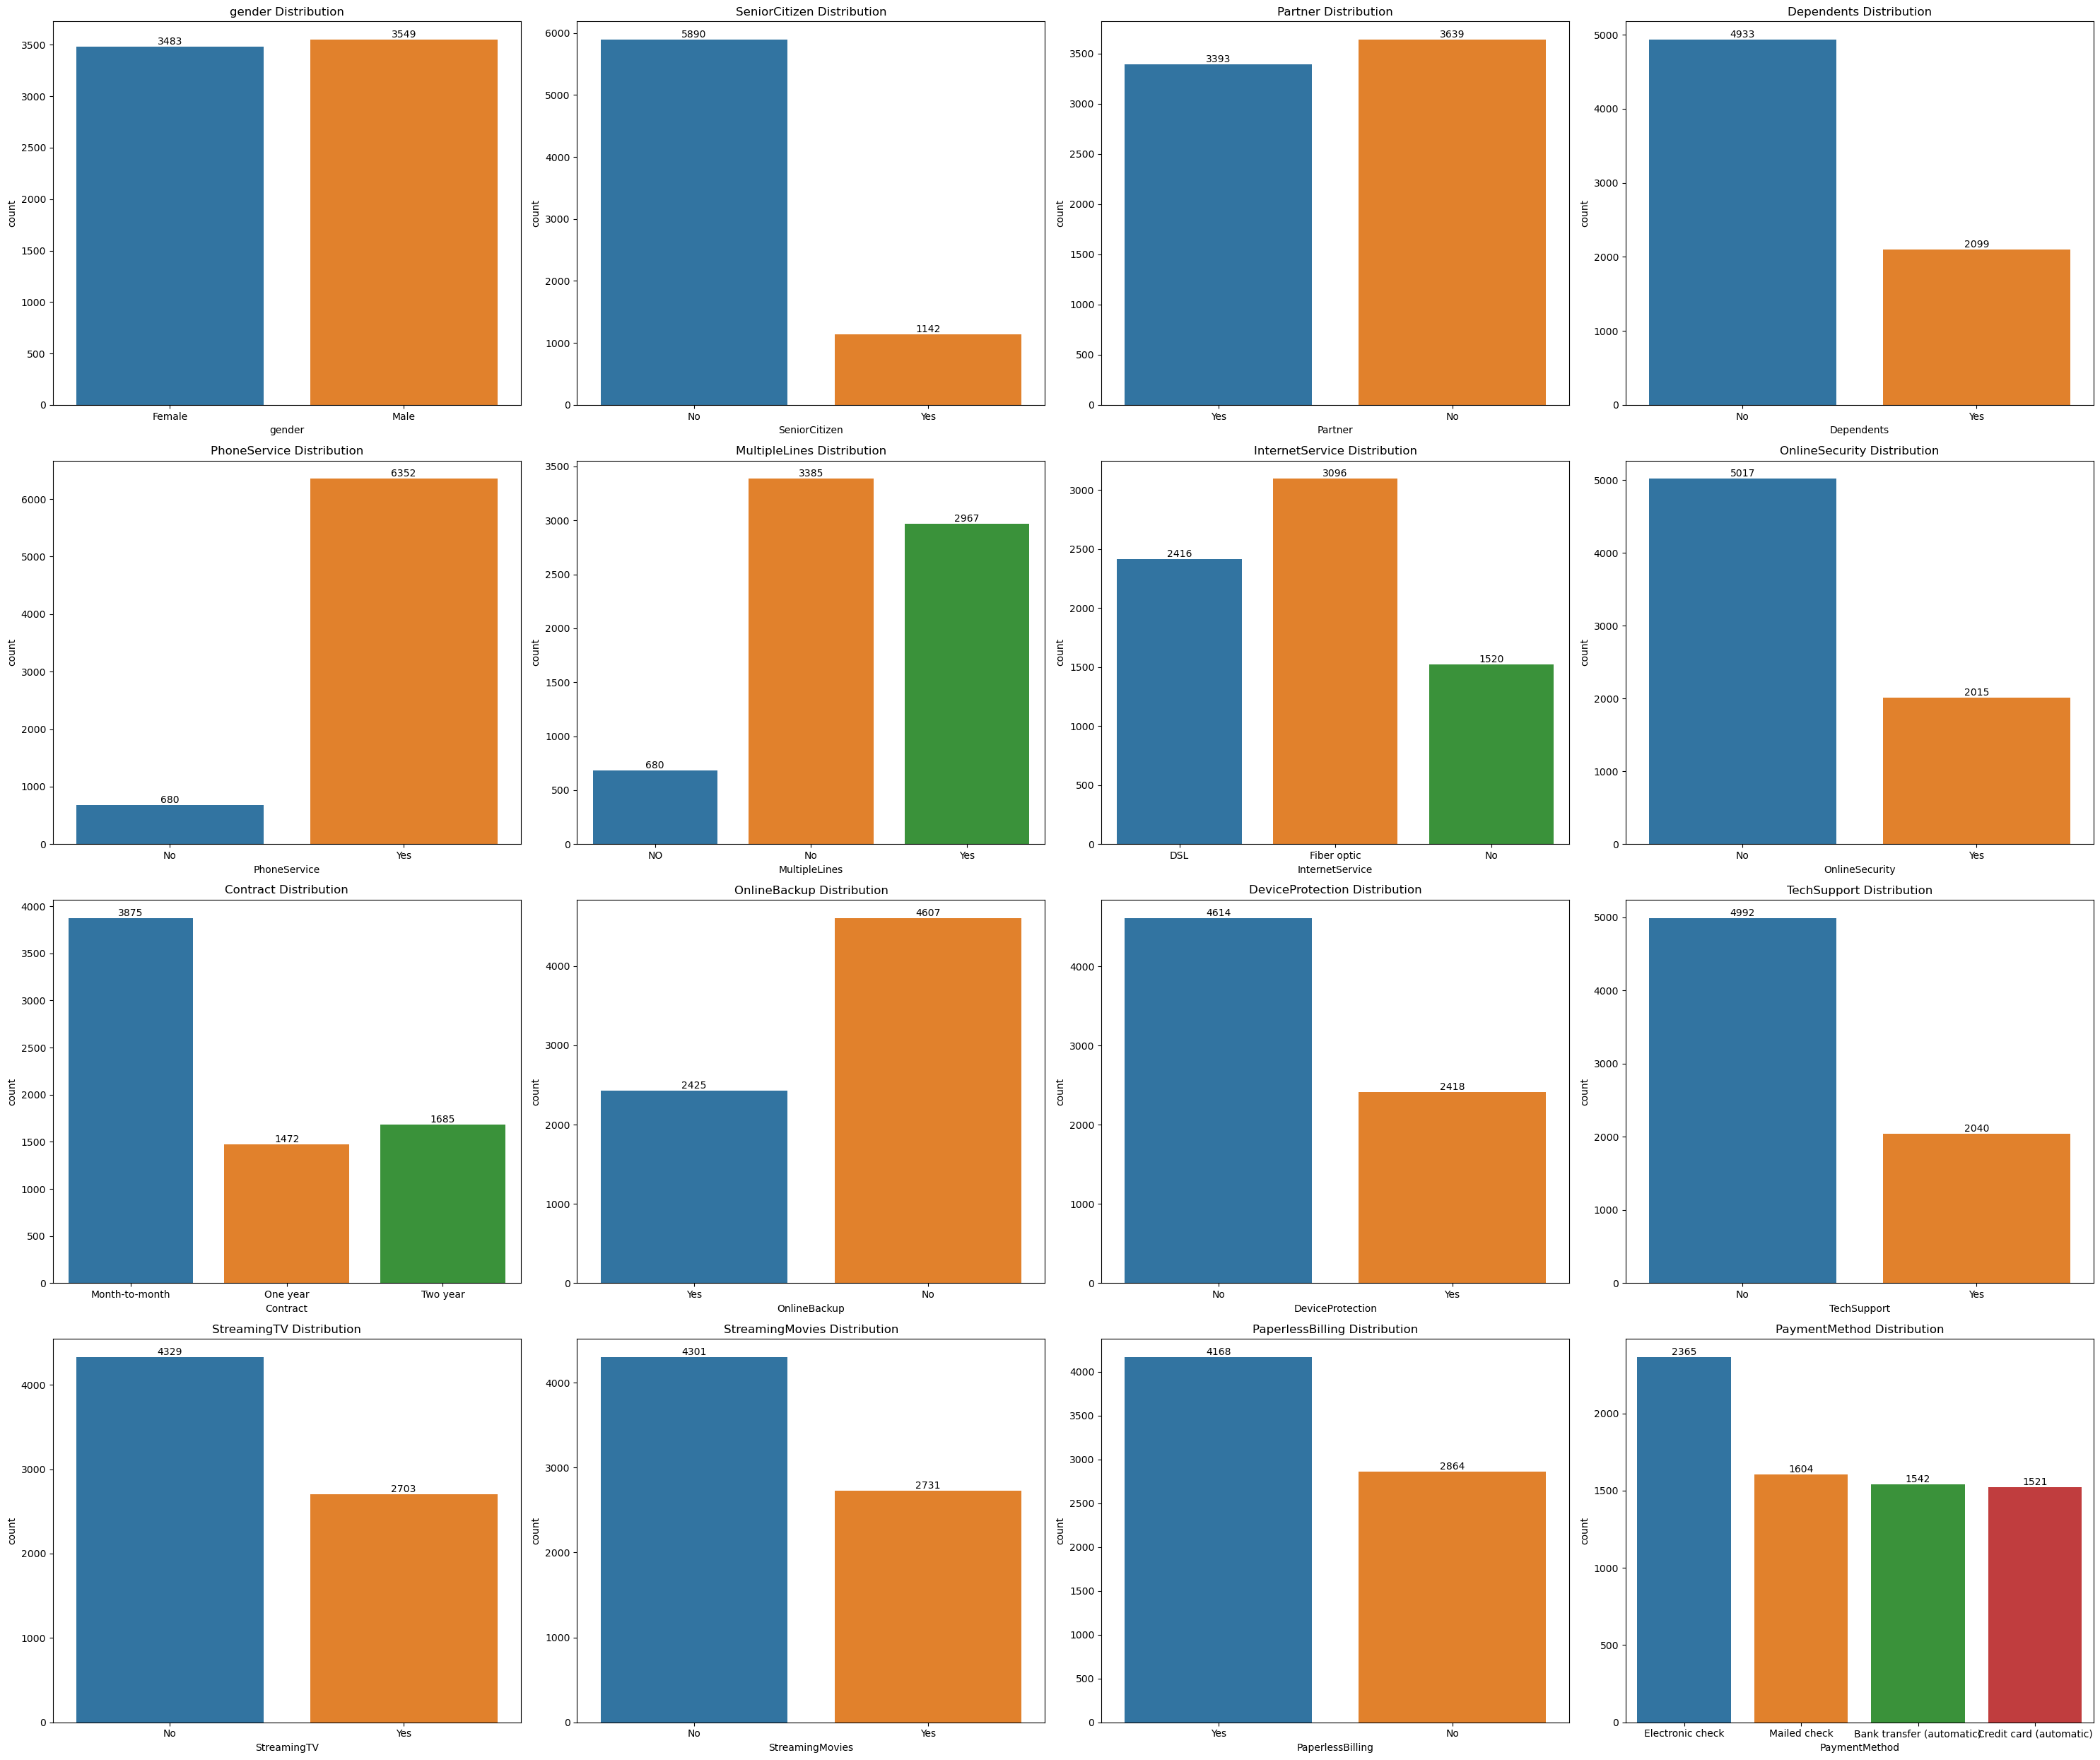

In [31]:
categorical_columns = ['gender', 
                       'SeniorCitizen', 
                       'Partner', 
                       'Dependents', 
                       'PhoneService', 
                       'MultipleLines', 
                       'InternetService', 
                       'OnlineSecurity', 
                       'Contract', 
                       'OnlineBackup', 
                       'DeviceProtection', 
                       'TechSupport', 
                       'StreamingTV', 
                       'StreamingMovies',
                       'PaperlessBilling', 
                       'PaymentMethod']

plt.figure(figsize = (30, 25))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    ax = sb.countplot(data = df, x = column)
    plt.title(f'{column} Distribution')
    
    # Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha = "center", va = "bottom")

plt.tight_layout()
plt.show()

### Observations

- Gender: The dataset is fairly balanced in terms of gender, with slightly more males (3549) than females (3483).
- Senior Citizen: A majority of the customers are not senior citizens (5890), with only 1142 being senior citizens.
- Dependents: 4933 customers do not have dependents and 2099 customers have dependents.
- PhoneService: A vast majority of customers (6352) have phone service, while a smaller number (680) do not.
- MultipleLines: More customers (3385) do not have multiple lines, compared to those who do (2967).
- InternetService: The most common internet service is Fiber optic (3096), followed by DSL (2416) and then No internet service (1520).
- OnlineSecurity: Most customers (5017) do not have online security, while a smaller portion (2015) do.
- OnlineBackup: A greater number of customers (4607) have online backup compared to those who don't (2425).
- DeviceProtection: Device protection is present for a larger group (4614) compared to those without it (2418).
- TechSupport: A significant majority (4992) do not have tech support, while only 2040 have it.
- StreamingTV: A majority (4329) have streaming TV, with 2703 customers not having it.
- StreamingMovies: Streaming movies is present for most customers (4301), with 2731 customers without it.
- PaperlessBilling: The majority (4168) have paperless billing, while 2864 customers do not.
- Contract: The most frequent contract type is "Month-to-month" (3875), followed by "Two year" (1685) and then "One year" (1472).
- Paperless Billing: 4168 customers have paperless billing and 2864 customers do not have paperless billing.
- PaymentMethod: The most common payment method is "Electronic check" (2365), followed by "Mailed check" (1604), "Bank transfer (automatic)" (1542), and "Credit card (automatic)" (1521).

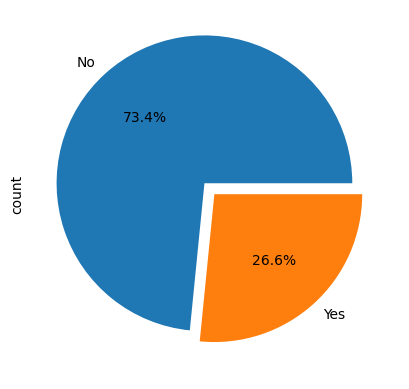

In [18]:
# Analyzing the distribution of the target variable

df['Churn'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode = [0.1,0])
plt.show()

### Observation

- We have 73.4% records as No and 26.6% as Yes for Churn.

## Bivariate Analysis

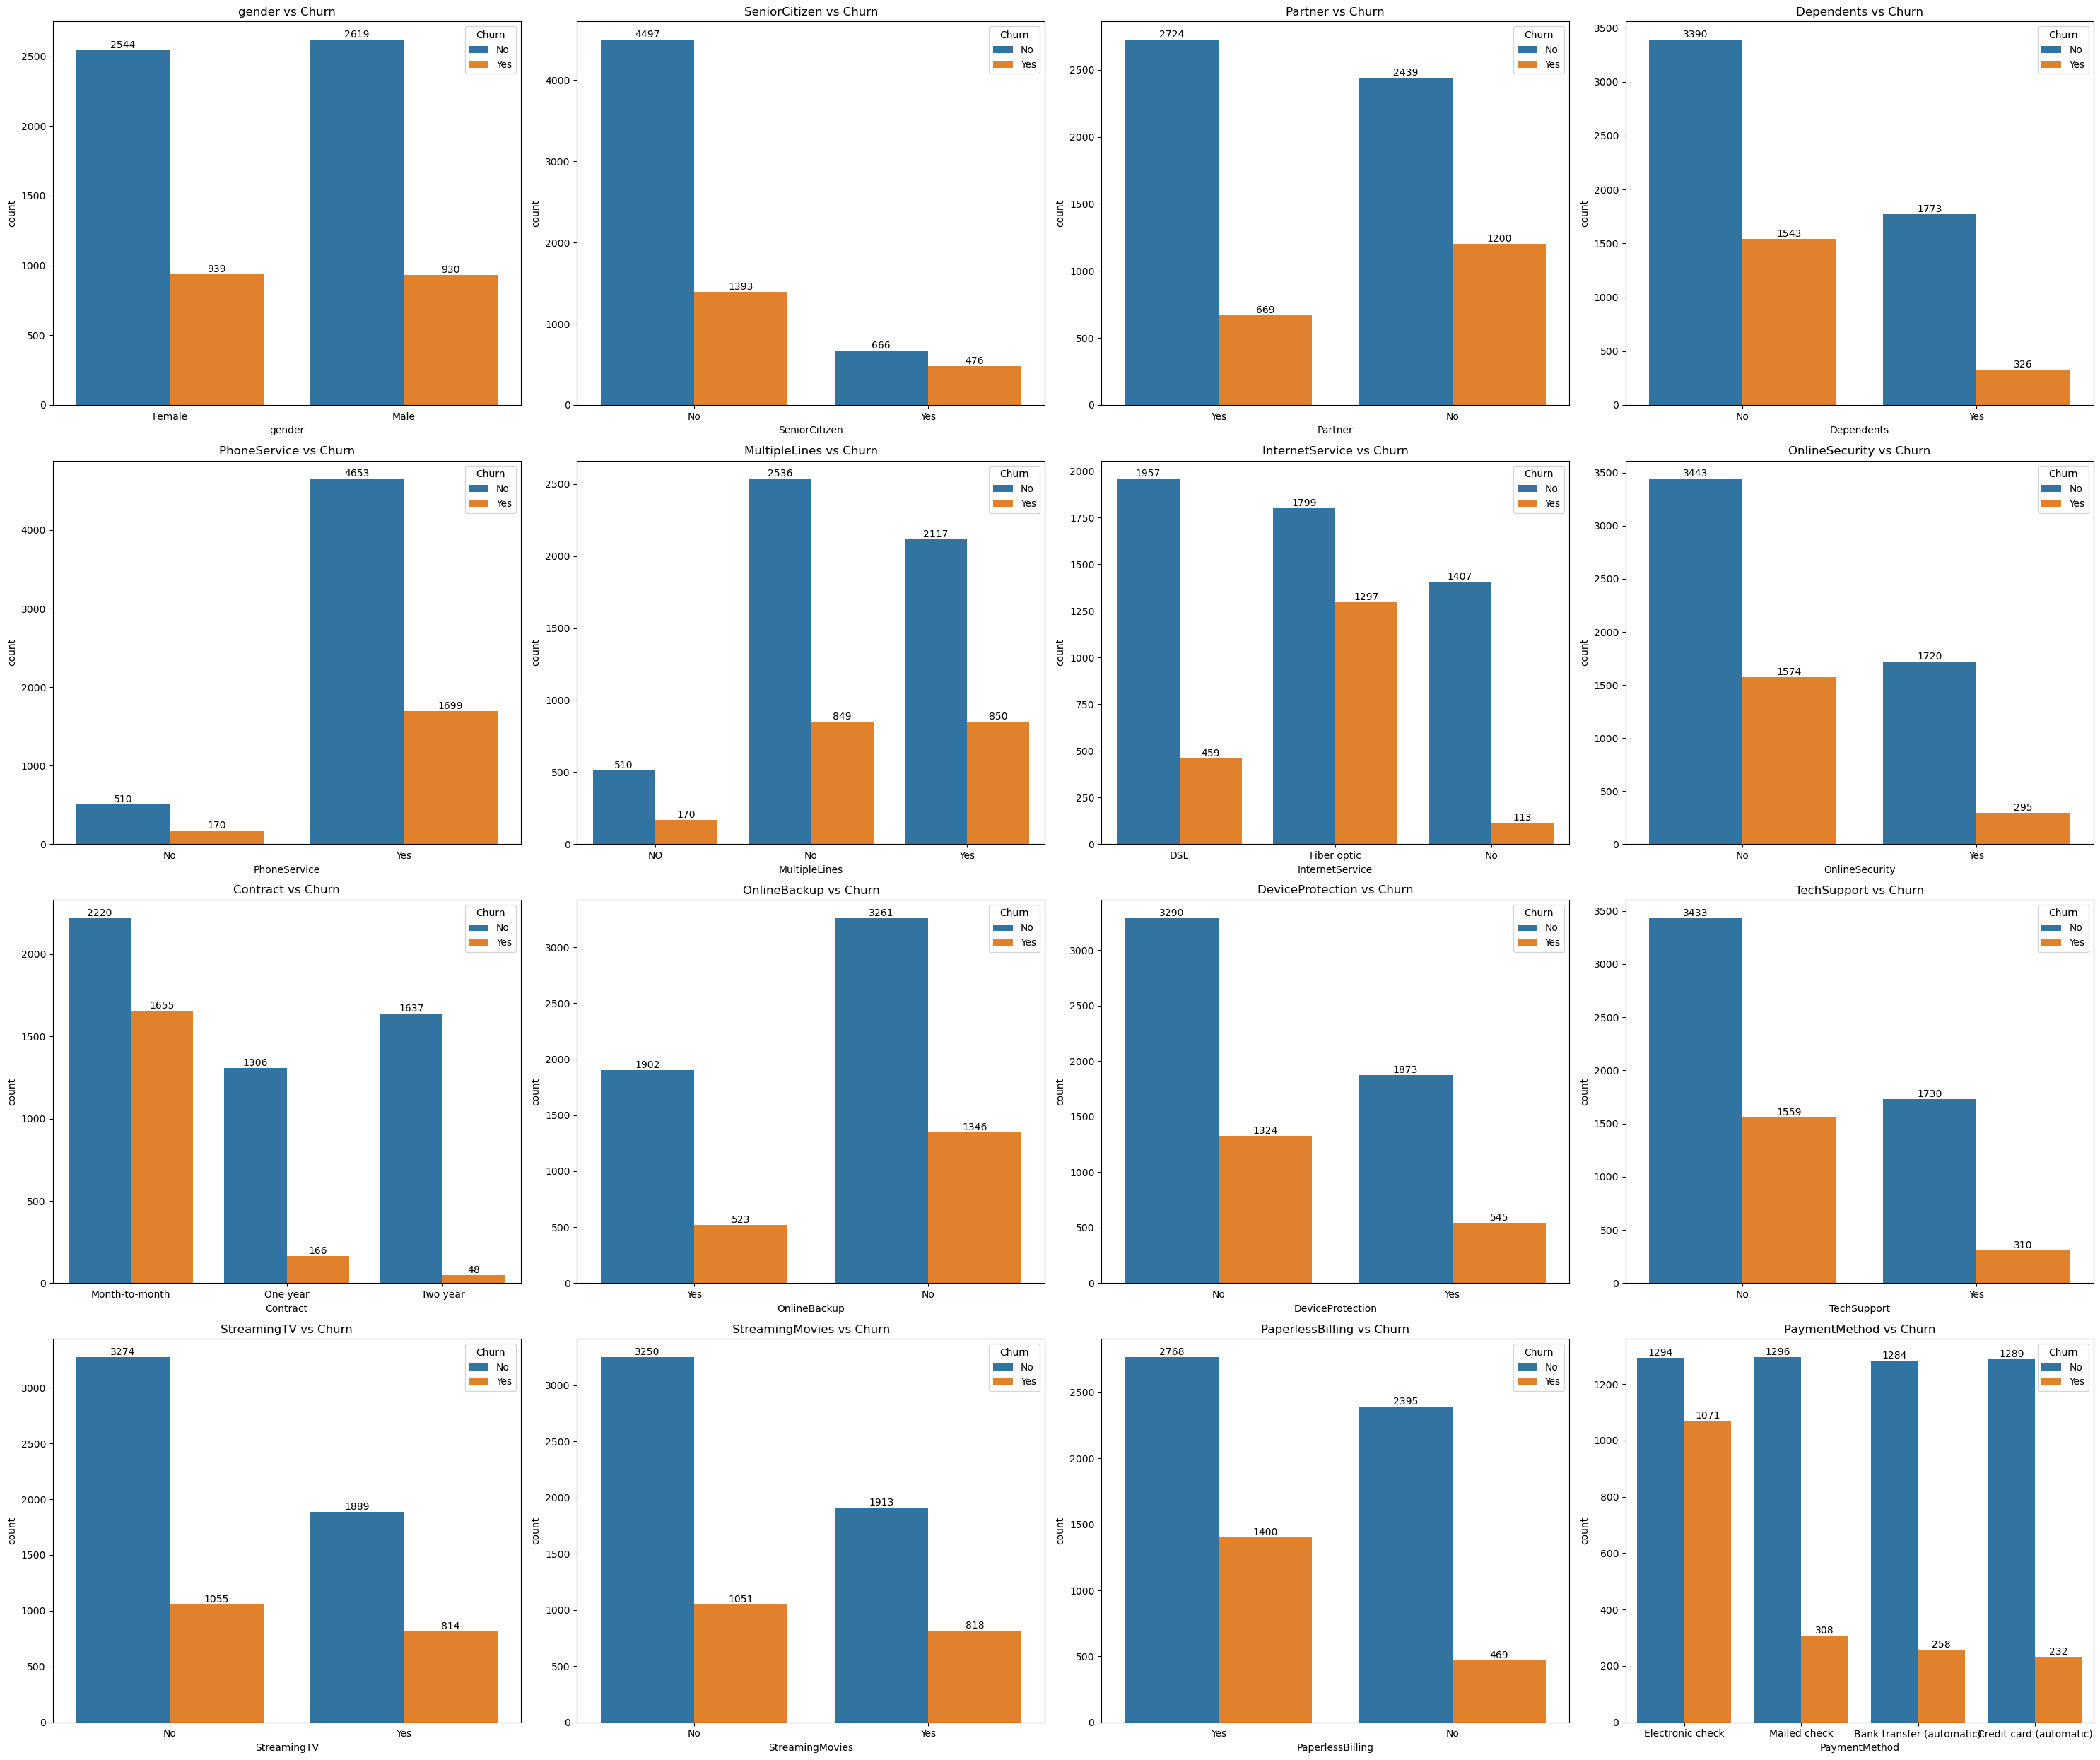

In [32]:
plt.figure(figsize = (30, 25))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    ax = sb.countplot(data = df, x = column, hue = 'Churn')
    plt.title(f'{column} vs Churn')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha = "center", va = "bottom")


plt.tight_layout()
plt.show()

### Observation

- Gender: There is no significant difference in churn rate between males and females.
- SeniorCitizen: Customers who are senior citizens are more likely to churn than those who are not.
- Partner: Customers who have a partner are less likely to churn than those who do not.
- Dependents: Customers who have dependents are less likely to churn than those who do not.
- PhoneService: Customers who have phone service are less likely to churn than those who do not.
- MultipleLines: Customers who have multiple lines are more likely to churn than those who do not.
- InternetService: Customers who have fiber optic internet service are more likely to churn than those who have DSL or no internet service.
- OnlineSecurity: Customers who do not have online security are more likely to churn than those who do.
- OnlineBackup: Customers who do not have online backup are more likely to churn than those who do.
- DeviceProtection: Customers who do not have device protection are more likely to churn than those who do.
- TechSupport: Customers who do not have tech support are more likely to churn than those who do.
- StreamingTV: Customers who do not have streaming TV are less likely to churn than those who do.
- StreamingMovies: Customers who do not have streaming movies are less likely to churn than those who do.
- Contract: Customers who have a one-year contract are less likely to churn than those who have a month-to-month contract.
- PaperlessBilling: Customers who have paperless billing are more likely to churn than those who do not.
- PaymentMethod: Customers who pay by electronic check are more likely to churn than those who pay by bank transfer (automatic).

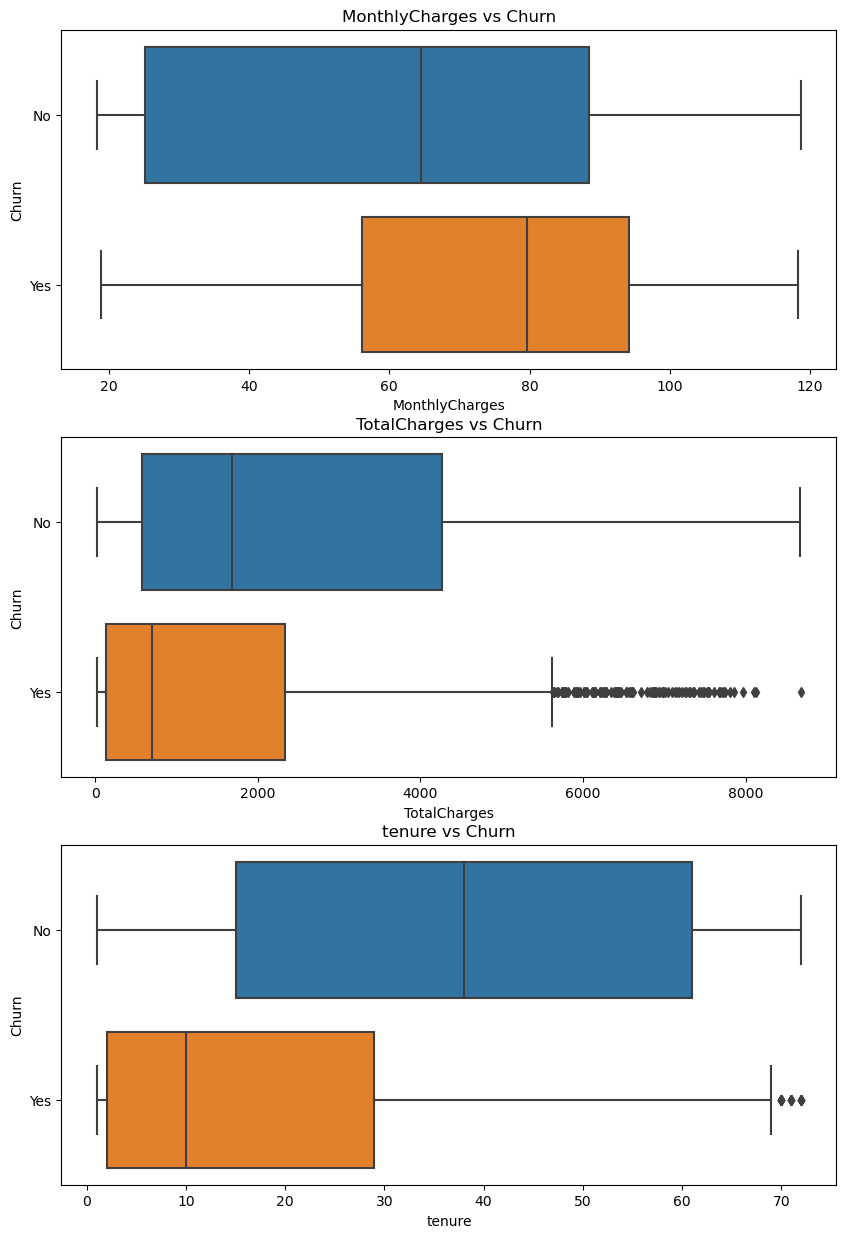

In [20]:
numerical_col = ['MonthlyCharges', 'TotalCharges', 'tenure']
plt.figure(figsize = (10, 15))
for i, column in enumerate(numerical_col, 1):
    plt.subplot(3, 1, i)
    sb.boxplot(y = 'Churn', x = column, data = df)
    plt.title(f'{column} vs Churn')
    plt.ylabel('Churn')
    plt.xlabel(f'{column}')
plt.show()

### Observation

- Customers with higher monthly charges and total charges are more likely to churn.
- Customers with shorter tenure are more likely to churn.
- There are outliers with high Total Charges for churned customers.
- For churned customers with high tenure have less outliers.

## Multivariate Analysis

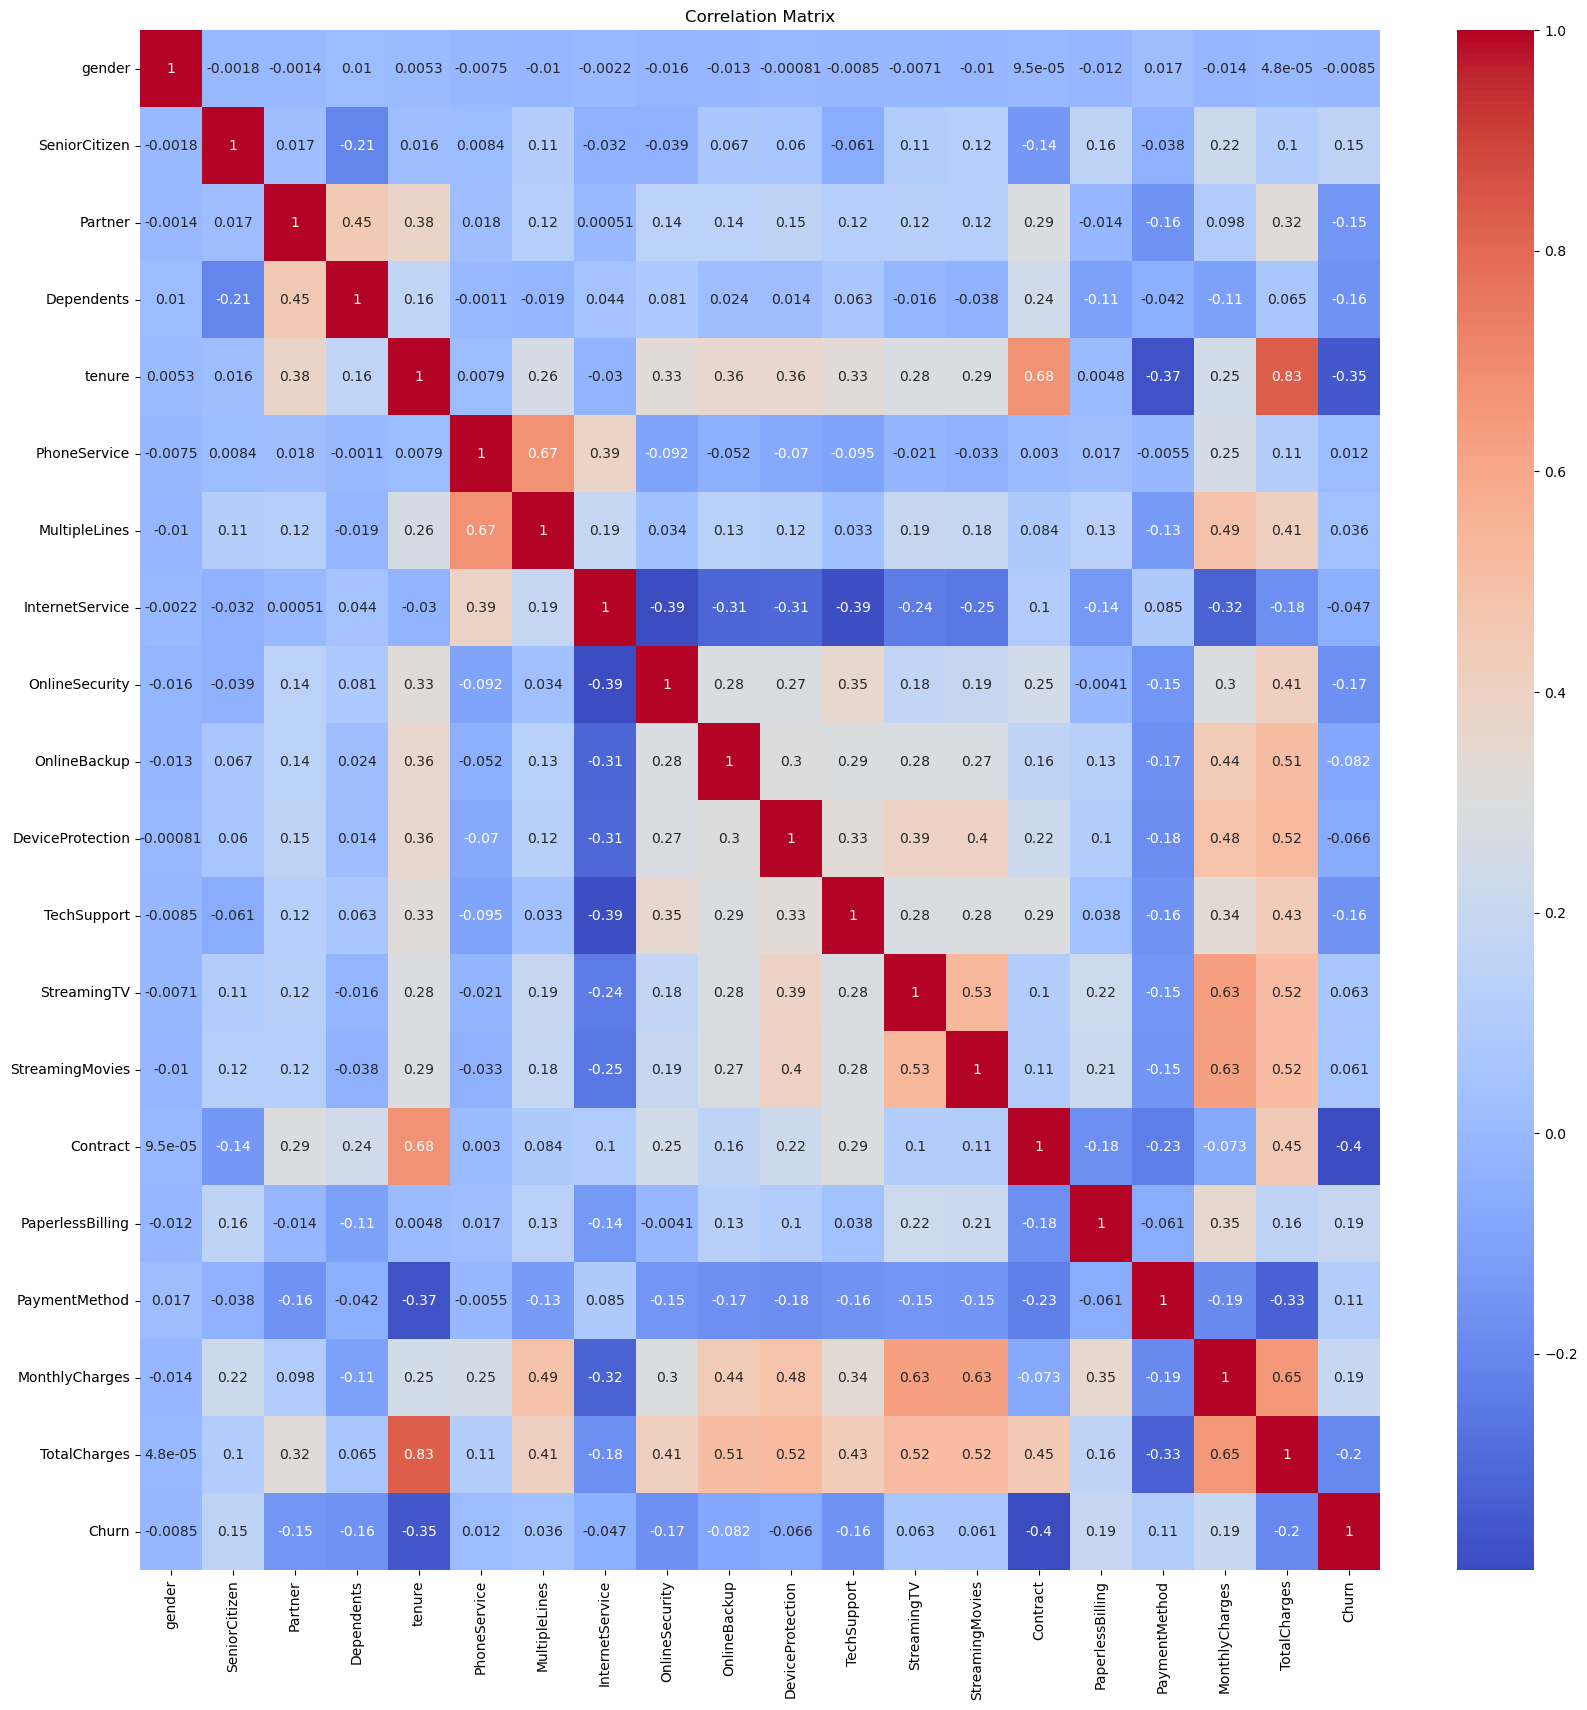

In [23]:
# Plotting a correlation matrix.

plt.figure(figsize = (20,20))
sb.heatmap(encoded_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observation

Strong Positive Correlations:

- TotalCharges and tenure: There's a strong positive correlation (0.83), suggesting that customers with longer tenure tend to have higher total charges.
- MonthlyCharges and TotalCharges: A strong positive correlation (0.65) exists, indicating that higher monthly charges are associated with higher total charges.
- Contract and tenure: A moderate positive correlation (0.67) suggests that customers with longer contracts tend to have longer tenure.
- MultipleLines and PhoneService: A strong positive correlation (0.94) indicates that customers with phone service are more likely to have multiple lines.
- InternetService and OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: There are moderate to strong positive correlations between InternetService and these variables, suggesting that customers with internet service are more likely to subscribe to these additional services.

Strong Negative Correlations:

- Churn and Contract: A moderate negative correlation (-0.36) suggests that customers with longer contracts are less likely to churn.
- Churn and tenure: A moderate negative correlation (-0.35) indicates that customers with longer tenure are less likely to churn.

# Data Preparation and Model Building

In [24]:
# Storing target column churn in Y and others in X.

X = encoded_df.drop(columns = ['Churn'])
y = encoded_df['Churn']

In [25]:
# Splitting the dataset into two parts 70% Train and 30% Test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [26]:
# Standardizing the column using z-score scaling using StandardScaler.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [27]:
# Model Training and Testing using Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

X_train_prediction = log_model.predict(X_train)
X_test_prediction = log_model.predict(X_test)

log_train_acc = accuracy_score(y_train, X_train_prediction)
log_test_acc = accuracy_score(y_test, X_test_prediction)

print("Accuracy Score of Logistic Regression on Training: {:.2f}%".format(log_train_acc * 100))
print("Accuracy Score of Logistic Regression on Testing: {:.2f}%".format(log_test_acc * 100))

Accuracy Score of Logistic Regression on Training: 80.27%
Accuracy Score of Logistic Regression on Testing: 80.00%


## K-Nearest Neighbors

In [28]:
# Model Training and Testing using K-Nearest_Neighbor.

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

X_train_prediction_knn = knn_model.predict(X_train)
X_test_prediction_knn = knn_model.predict(X_test)

knn_train_acc = accuracy_score(y_train, X_train_prediction_knn)
knn_test_acc = accuracy_score(y_test, X_test_prediction_knn)

print("Accuracy Score of KNN on Training: {:.2f}%".format(knn_train_acc * 100))
print("Accuracy Score of KNN on Testing: {:.2f}%".format(knn_test_acc * 100))

Accuracy Score of KNN on Training: 83.79%
Accuracy Score of KNN on Testing: 75.88%


## Naive Bayes

In [29]:
# Model Training and Testing using Naive Bayes.

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

X_train_prediction_nb = nb_model.predict(X_train)
X_test_prediction_nb = nb_model.predict(X_test)

nb_train_acc = accuracy_score(y_train, X_train_prediction_nb)
nb_test_acc = accuracy_score(y_test, X_test_prediction_nb)

print("Accuracy Score of Naive Bayes on Training: {:.2f}%".format(nb_train_acc * 100))
print("Accuracy Score of Naive Bayes on Testing: {:.2f}%".format(nb_test_acc * 100))

Accuracy Score of Naive Bayes on Training: 75.48%
Accuracy Score of Naive Bayes on Testing: 75.92%


### Model Comparison

In [30]:
models = pd.DataFrame({
        'Model': ['Logistic Regression', 'KNN', 'Naive Bayes'],
        'Train Accuracy': [log_train_acc, knn_train_acc, nb_train_acc],
        'Test Accuracy': [log_test_acc, knn_test_acc, nb_test_acc]
        })
print(models)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.802722       0.800000
1                  KNN        0.837871       0.758768
2          Naive Bayes        0.754774       0.759242


- Test Accuracy: Logistic Regression achieved a test accuracy of 80.00%, which is higher than both KNN (75.88%) and Naive Bayes (75.92%).

- Train Accuracy: KNN achieved a test accuracy of 83.78%, which is higher than both Logistic Regression (80.27%) and Naive Bayes (75.47%).

### Model Selection


#### Best Model: Logistic Regression
#### Best Model Based only on Training Accuracy: KNN
- Based on the Training accuracy we will select KNN as it has the higher training accuracy among Logistic Regression and Naive Bayes.

- But the difference between Logistic Regression's training and testing accuracy (0.27%) is smaller compared to KNN (7.91%) and Naive Bayes (0.44%). This indicates that Logistic Regression is less prone to overfitting the training data and might generalize better to unseen data.

- Logistic Regression appears to be the best model among the three based on the provided results. It has the highest test accuracy and maintains a good balance between training and test performance. The minimal difference between training and testing accuracies suggests it has a good generalization ability, which is crucial for making accurate predictions on new, unseen data.

## Conclusion and Improvisation

#### Conclusion
- Best Model: Based on test accuracy and generalization, Logistic Regression is the most reliable model for predicting churn. It balances accuracy and avoids overfitting compared to KNN, which has a significant drop in test accuracy relative to training accuracy.

- Churn Insights: Customers with higher monthly and total charges, shorter tenures, and certain service features are more likely to churn. Understanding these factors can help in strategizing retention efforts.

#### Improvisation
Feature Engineering:
- Creating interaction and polynomial features to capture complex relationships.

Model Enhancement:
- Tuning hyperparameters and consideing ensemble methods to improve performance.

Feature Scaling:
- Appling normalization and log transformation to handle skewed features.

Data Augmentation:
- Collecting more data or generate synthetic samples for balanced datasets.

Evaluation:
- Using cross-validation and additional metrics (e.g., Precision, Recall) for a comprehensive performance assessment.